# Assignment-02, Probability Model A First Look: An Introduction of Language Model

## Assignment

1. Review the course online programming code; 
2. Review the main questions; 
3. Using wikipedia corpus to build a language model. 

## 1. Review the course online programming code. 

*In this part, you should re-code the programming task in our online course.*

> Please see the file 'lec2_inclass_ex.ipynb'
> 

> 
> 





## 2. Review the main points of this lesson. 

##### 1. How to Github and Why do we use Jupyter and Pycharm; 

Ans: Github是一款代码版本管理软件，他能够记录不同版本的代码，以便开发者进行开发。同时它也提供了让多位开发者共同作业的功能。
    Git流程一般先是在远程创建一个新的代码库，然后将本地的代码进行初始化提交。
    然后在本地代码有变动时，可以将这些变动保存，然后提交至远程代码库，形成一个新的版本。
    在进行一些问题的修改时，可以使用多分支来进行不同方向的修改，之后在进行了代码确认之后，可以合并分支。
    
Ans: jupyter是一款markdown风格的浏览器代码编辑器，在jupyter里，开发者可以将代码分为一个个块运行，非常适合进行单个文件模块的开发与调试。

Ans: Pycharm是一款python的编辑器，适用于多个模块文件的大项目开发与调试，同时也支持断点调试等功能。

总的来说，上面两款工具都是非常友好的IDE，功能强大，适用于不同的开发场景。


##### 2. What's the Probability Model?

Ans: 概率模型是用来描述不同随机变量之间关系的数学模型，用来描述变量之间的概率关系。

##### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:斗地主、麻将、天气预报。

##### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match? 


Ans:因为概率论能够更好的抽象现实生活中的许多问题；对于模式匹配或者语法分析，在遇到过于多变的问题，比如人类语言的时候就会导致语法或者模式过于复杂，却得不到很好的效果。

##### 5. What's the Language Model;

Ans: 我个人觉得这个定义很难表达....语言模型是对人类语言问题的一种抽象，我们期望建立一个合理的语言模型来描述人类语言分析这个问题。


#####  6. Can you came up with some sceneraies at which we could use Language Model?

Ans: 语音识别，文字识别。

##### 7. What's the 1-gram language model;

Ans:1-gram语言模型是只使用单个词在语料库里的概率来作为计算语句是否正确的概率，并不关心句子中词与词之间共同出现的概率的一种语言模型。

##### 8. What's the disadvantages and advantages of 1-gram language model;

Ans: 优点：简单明了，计算过程也很简单。
    缺点：最终语句的概率直接受语料库中单字的概率的影响，不能很好的应用到实际的场景中，而且逻辑过程完全没有考虑语境搭配的实际问题，会出现偏差。

##### 9.  What't the 2-gram models; 

Ans: 与1-gram类似，但这个模型会计算两个单词搭配出现时的概率。极大地提高了模型的判断准确率，能够更好的解决问题。

##### 10. what's the web crawler, and can you implement a simple crawler? 

Ans: 我个人会把爬虫当做是一种自动脚本，自动的爬取页面上的信息。
    1. 先是模拟人类浏览向站点发送网络请求。
    2. 获得站点返回的网页。
    3. 根据需要在网页上抓取相关信息。
    4. 下一个网页。

##### 11.  There may be some issues to make our crwaler programming difficult, what are these, and how do we solve them?

Ans: 各种各样的反爬手段，最好的解决问题方向就是让自己的爬虫更加像一个“人类”在操作网页。

##### 12. What't the Regular Expression and how to use?

Ans: 正则表达式是对字符串操作的一种逻辑公式，就是用事先定义好的一些特定字符、及这些特定字符的组合，组成一个“规则字符串”，这个“规则字符串”用来表达对字符串的一种过滤逻辑（百度百科描述...）。
    
    用法千千万，根据需求来编写合适的表达式来匹配需要的内容。

## 3. Using Wikipedia dataset to finish the language model. 

Step 1: You need to download the corpus from wikipedis:
> https://dumps.wikimedia.org/zhwiki/20190401/

Step 2: You may need the help of wiki-extractor:

> https://github.com/attardi/wikiextractor


Step 2: Pre-processing = 去除特定字符->读取数据->转换简体->生成语料list。

In [2]:
"""
将zhwiki中的文件去除空格、回车、xml标签、并转换为中文保存在txt中。
因为文件过于巨大，自己的小本子跑不动，我就只弄了一部分进去...
"""
from hanziconv import HanziConv
import os
import pandas as pd
"""遍历文件夹、读取文件"""
if not os.path.exists('./output_zhwiki.txt'):
    outputFile= open("./output_zhwiki.txt",'w',encoding='gb18030')
    for root, dirs, files in os.walk('./zhwiki/'):
        print(root)
        for filename in files:
            file_path = root + '/' + filename        
            for line in open(file_path,'rb'):
                string="<"
                if not line.find(string.encode()):
                    continue
                line = HanziConv.toSimplified(line)
                if line=='\n':
                    continue
                #print(line)
                outputFile.write(line)

    outputFile.close()

./zhwiki/
./zhwiki/AA
./zhwiki/AB
./zhwiki/AC
./zhwiki/AD
./zhwiki/AE
./zhwiki/AF
./zhwiki/AG
./zhwiki/AH
./zhwiki/AI
./zhwiki/AJ
./zhwiki/AK
./zhwiki/AL
./zhwiki/AM


In [2]:
"""因为文本量确实大，所以我这里选择正则先把一些符号都过滤掉，再放到cut里进行切割。"""
from hanziconv import HanziConv
import re
symbol='[^（|^）|^《|^》|^、|^“|^”|^「|^」|^：|^?|^\(|^\)|^·|^……|^；|^，|^\-|^,|^。|^:|^-|^.|^/]'
symbol='[^(（|）|《|》|“|”|「|」|，|。|、|\-|：|·|；|?|,|.|:|"|\'|\')]'
#print(symbol)
def token(string):
    return ''.join(re.findall(symbol,string))

inputFile = open("./output_zhwiki.txt",encoding='gb18030')
a=inputFile.read()
#print(a)
text=token(str(a))
TEXT=text

# Step 3: Using the technologies and methods to finish the language model;

In [3]:
import jieba

In [4]:
def cut(string):return list(jieba.cut(string))

In [5]:
ALL_TOKEN=cut(TEXT)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dell\AppData\Local\Temp\jieba.cache
Loading model cost 0.859 seconds.
Prefix dict has been built succesfully.


In [6]:
from collections import Counter

In [7]:
valida_tokens = [t for t in ALL_TOKEN if t.strip() and t != 'n']
words_count = Counter(valida_tokens)

In [8]:
words_count.most_common(10)

[('的', 1062792),
 ('年', 308631),
 ('在', 300202),
 ('是', 227571),
 ('和', 162073),
 ('为', 161238),
 ('月', 137551),
 ('了', 134296),
 ('与', 99665),
 ('有', 87395)]

In [9]:
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)
print(frequences_sum)

20866800


In [10]:
def get_prob(word): 
    esp = 1 / frequences_sum
    if word in words_count: 
        return words_count[word] / frequences_sum
    else:
        return esp

In [11]:
get_prob('我们')

0.0002446469990607089

In [12]:
from functools import reduce
def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

# 1-gram

In [13]:
def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [14]:
language_model_one_gram('小明今天抽奖抽到一台苹果手机')

7.12938727860261e-36

# 2-gram

$$ Pr(S) = Pr(w_1\cdot w_2 \cdots w_n) \sim Pr(w_1) \cdot Pr(w_2 | w_1) \cdots Pr(w_n | w_{n-1})$$

$$ Pr(w_2 | w_1) =  \frac { Pr(w_1 \cdot w_2) }{Pr(w_1)} $$ 


In [15]:
valid_tokens = [str(t) for t in valida_tokens] 
all_2_grams_words = [''.join(valid_tokens[i:i+2]) for i in range(len(valid_tokens[:-2]))]

In [16]:
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1, w2):
    """若是在语料库中存在这么两个词的组合，就返回真是概率，若是么得，就返回一个固定的值。"""
    if w1 + w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum
    
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

def langauge_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words_2_gram = cut(sentence)
    
    for i, word in enumerate(words_2_gram):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words_2_gram[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [17]:
langauge_model_of_2_gram('小明今天抽奖抽到一台苹果手机')

2.828884782883177e-19

# 3-gram

$$ Pr(S) = Pr(w_1\cdot w_2 \cdots w_n) \sim Pr(w_1 | *,*) \cdot Pr(w_2 | *,w_1) \cdot Pr(w_3 | w_1,w_2) \cdots Pr(w_n | w_{n-2},w_{n-1})$$

$$ Pr(w_3 | w_1,w_2)=  \frac { Pr(w_3 \cdot (w_1,w_2)) }{Pr(w_1,w_2)} $$ 


In [18]:
all_3_grams_words = [''.join(valid_tokens[i:i+3]) for i in range(len(valid_tokens[:-3]))]


In [19]:
_3_gram_sum = len(all_3_grams_words)
_3_gram_counter = Counter(all_3_grams_words)


In [20]:
_3_gram_counter.most_common(10)

[('年1月', 9717),
 ('年12月', 9002),
 ('年3月', 8897),
 ('年4月', 8625),
 ('年10月', 8517),
 ('年7月', 8430),
 ('年5月', 8391),
 ('年9月', 7816),
 ('的人口为', 7758),
 ('年11月', 7727)]

In [21]:
def get_3_combination_prob(w1, w2,w3):
    """若是在语料库中存在这么3个词的组合，就返回真是概率
        若是存在两个词的组合，就返回2-gram里的概率值。
        若是不符合任何排列组合，那么将平方往上的惩罚以达到最大的惩罚限度。"""
    if w1+w2+w3 in _3_gram_counter:        
        return _3_gram_counter[w1+w2+w3]/_3_gram_sum
    
    elif w1+w2 in _2_gram_counter:         
        w1_w2_pro=_2_gram_counter[w1+w2] / _2_gram_sum        
        return w1_w2_pro#*get_prob(w3)
    
    else:
        return 1 / (_3_gram_sum*_3_gram_sum)
    
    
def get_prob_3_gram(w1, w2,w3):
    return get_3_combination_prob(w1,w2,w3) / get_prob_2_gram(w1,w2)

def langauge_model_of_3_gram(sentence):
    sentence_probability = 1
    
    words_3_gram = cut(sentence)
    
    for i, word in enumerate(words_3_gram):
        if i == 0: 
            prob = get_prob(word)
        if i==1:
            prob = get_prob_2_gram(words_3_gram[i-1],word)
        else:
            moreprevious = words_3_gram[i-2]
            previous = words_3_gram[i-1]
            prob = get_prob_3_gram(moreprevious,previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [22]:
print(langauge_model_of_3_gram('小明今天抽奖抽到一台苹果手机'))
print(langauge_model_of_3_gram('小明今天抽奖抽到一台播音飞机'))

2.0747950210022668e-69
3.572351677215037e-77


# Step 4: Try some interested sentence pairs, and check if your model could fit them

In [23]:
need_compared = [
    "我要用蔬菜擦汗 我要用纸巾擦汗",
    "我在用电脑写代码 我在用电脑擦玻璃",
    "我在玩电脑 我在看玻璃"
]
print('电脑: {}'.format(get_prob('电脑')))
print('玻璃: {}'.format(get_prob('玻璃')))
print('玩电脑: {}'.format(get_prob_2_gram('玩', '电脑')))
print('擦玻璃: {}'.format(get_prob_2_gram('擦', '玻璃')))
print('\n')
for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = langauge_model_of_2_gram(s1), langauge_model_of_2_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

电脑: 8.822627331454751e-05
玻璃: 3.153334483485729e-05
玩电脑: 0.002680965404412982
擦玻璃: 0.01041666766506294


我要用纸巾擦汗 is more possible
---- 我要用蔬菜擦汗 with probility 3.353918191549259e-14
---- 我要用纸巾擦汗 with probility 1.1067930032112556e-12
我在用电脑擦玻璃 is more possible
---- 我在用电脑写代码 with probility 5.133931009995994e-19
---- 我在用电脑擦玻璃 with probility 1.3444481832427009e-17
我在玩电脑 is more possible
---- 我在玩电脑 with probility 2.6339928557151347e-11
---- 我在看玻璃 with probility 5.569835358346567e-13


In [24]:
need_compared = [
    "我要用蔬菜擦汗 我要用纸巾擦汗",
    "我在用电脑写代码 我在用电脑擦玻璃",
    "我在玩电脑 我在看玻璃"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = langauge_model_of_3_gram(s1), langauge_model_of_3_gram(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

我要用纸巾擦汗 is more possible
---- 我要用蔬菜擦汗 with probility 1.4446835844433565e-30
---- 我要用纸巾擦汗 with probility 9.135126557917684e-25
我在用电脑写代码 is more possible
---- 我在用电脑写代码 with probility 2.0653778000954917e-35
---- 我在用电脑擦玻璃 with probility 7.886884200841973e-37
我在玩电脑 is more possible
---- 我在玩电脑 with probility 5.451676659238218e-15
---- 我在看玻璃 with probility 2.3212626481769797e-21


# Step 5: If we need to solve following problems, how can language model help us? 



+ Voice Recognization.

    语音识别模型将语音转化为文本，再用语言模型对文本进行校正。
    
    
+ Sogou *pinyin* input.

    自动联想/长句输入自动纠错
    

+ Auto correction in search engine.

    搜索时自动纠错并搜索‘概率较高’的关键字
    

+ Abnormal Detection.

    对用户输入的内容进行概率判断，若是概率过小则进入异常处理的模块中进行相应处理。
    
    


### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

Ans: 对于概率语言模型，所使用语料库起着关键性的作用。

    优点：通用性较强，可以解决大部分问题，而且准确率并不算低。
    
    缺点：过于依赖语料库，若是语料库中语料不平衡，会导致模型失准严重。同时，在解决长句时的计算量增加过大，模型设计难度变大，且长句的判断概率逐渐向0收敛，最终导致无法准确的进行判断。

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

Ans: 对于没有出现过的词，我们上面模型的处理方法是直接返回一个定值的概率。
    还有其他的方法：
    1. 扩大词表，增加语料库的词汇种类与数量。
    2. 制作分词字典，减少因为分词而带来的OOV影响。
    3. 制作类别标签，在遇到OOV问题时候，将这个词抽象为一个类别的其他词进行概率计算。

Then, the sencond question is: 

**Q2: Read about the 'Good-Turing Estimator', can explain the main points about this method, and may implement this method in your programming task**

解释：good-turing estimator是通过数学方法来平滑数据的一种算法。这个算法旨在解决第一次见到的也就是上面提到的OOV词汇问题。对于没有出现在训练集中的词汇、或者出现次数非常少的词汇，我们通过‘这个词汇出现数目阶层+1’的那个词汇的频率来估算这个词汇的概率。对于出现频率高于某个值的词汇，我们保持他的概率不变。这样就会导致“频率过低的词汇不会和高频词汇差距过大”使得在模型在判断有OOV词汇的句子时的准确率上升。


Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37


我在此处使用单纯的1-gram模型作为实现演示。代码非常混乱，我自己也有点乱...

In [25]:
a=words_count.most_common()


In [26]:
words_counting=len(a)
counter=list()
refer_list=list()
i=-1
word_nums_pre=0

for ele in a:
    word_nums=ele[1]
    if word_nums_pre==word_nums:
        counter[i]+=1
    else:
        counter.append(1)
        refer_list.append(word_nums)
        i+=1
        word_nums_pre=word_nums
level_nums=len(counter)
counter.reverse()
refer_list.reverse()
for i in range(0,8):
    print('出现了{}次的词有{}个，占总词数的{:.10f}%'.format( refer_list[i],counter[i],(counter[i]/frequences_sum*100)))


出现了1次的词有395755个，占总词数的1.8965773382%
出现了2次的词有99462个，占总词数的0.4766519064%
出现了3次的词有49553个，占总词数的0.2374729235%
出现了4次的词有29779个，占总词数的0.1427099507%
出现了5次的词有20316个，占总词数的0.0973604003%
出现了6次的词有15417个，占总词数的0.0738829145%
出现了7次的词有11994个，占总词数的0.0574788659%
出现了8次的词有9719个，占总词数的0.0465763797%



$$ Pr =  \frac { (r+1) \cdot S(N_{r+1}) }{N} $$ 


In [27]:
pr_list=[0 for i in range(0,level_nums)]
print(len(pr_list))
r=1
N0=counter[0]/frequences_sum

for i in range(0,level_nums-1):
    pr_list[i]=((i+2)*counter[i+1])/frequences_sum
pr_list[level_nums-1]=a[0][1]/frequences_sum
print(pr_list[-10:])


2788
[0.00013322598577644872, 0.00013327390879291505, 0.0001333218318093814, 0.00013336975482584776, 0.0001334176778423141, 0.00013346560085878047, 0.0001335135238752468, 0.00013356144689171315, 0.0001336093699081795, 0.05093219851630341]


In [40]:
def get_good_turing_pr(word):
    position=refer_list.index((words_count[word]))
    return pr_list[position]

In [41]:
def get_prob_good_turing(word): 
    esp = 1 / frequences_sum
    if word in words_count: 
        return get_good_turing_pr(word)
    else:
        """对于没有看见过的个体，他的频率就等于看见过1次的/总数"""
        return counter[0]/frequences_sum

In [42]:
from functools import reduce
def product_good_turing(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

In [43]:
def language_model_one_gram_good_turing(string):
    words = cut(string)
    return product_good_turing([get_prob_good_turing(w) for w in words])


In [48]:
language_model_one_gram_good_turing('小明今天抽奖抽到一台苹果手机')

4.089437779579627e-24

In [49]:
language_model_one_gram('小明今天抽奖抽到一台苹果手机')

7.12938727860261e-36

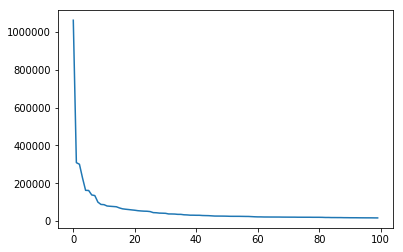

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
frequences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(len(frequences[:100]))]

plt.plot(x, frequences)

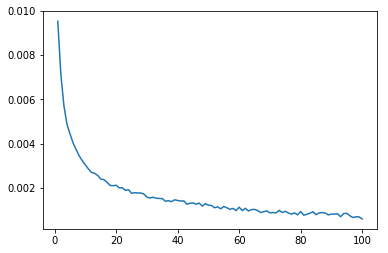

In [51]:
plt.plot(refer_list[:100], pr_list[:100])